## variants of gradient desent optimization

### batch gradient  desent  vs  stochastic gradient desent  vs  mini batch GD

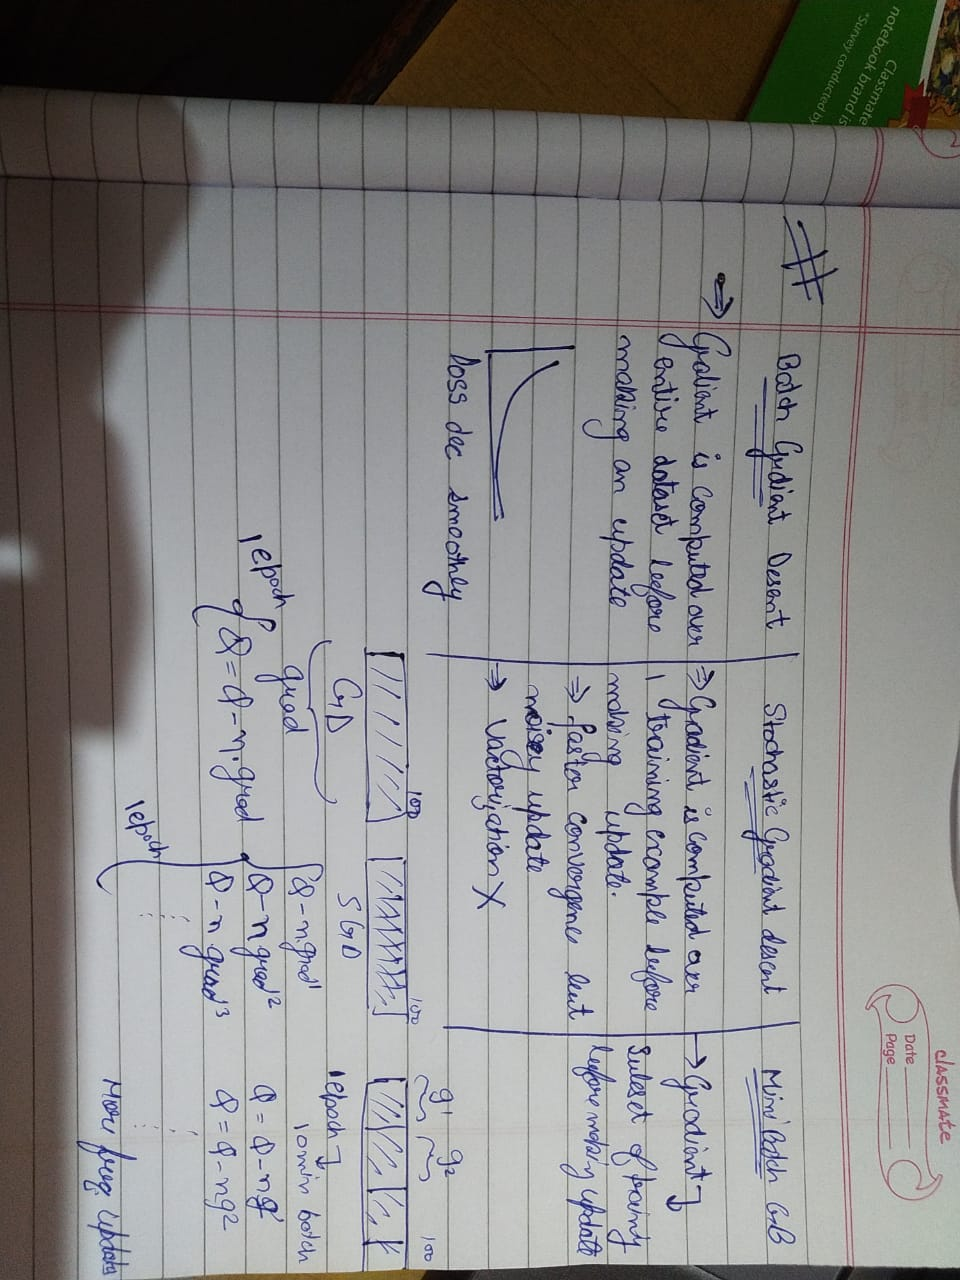

In [26]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
from sklearn.datasets import load_boston


In [9]:
X,y=make_regression(n_samples=10000,n_features=20,n_informative=20,noise=10,random_state=1)

In [10]:
u=np.mean(X,axis=0)
std=np.std(X,axis=0)
X=(X-u)/std

In [11]:
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape,y.shape)

(10000, 21) (10000,)


In [55]:
def hyp(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    e=0.0
    y_=hyp(X,theta)
    e=np.sum((y-y_)**2)
    
    return e/X.shape[0]

def gradient(X,y,theta):
    y_=hyp(X,theta)
    grad=np.dot(X.T,(y_-y))
    m=X.shape[0]
    
    return grad/m


# batch gradient desent
def gradient_desent(X,y,learning_rate=0.01,max_steps=300):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    
    for i in range(max_steps):
        e=error(X,y,theta)
        error_list.append(e)
        
        grad=gradient(X,y,theta)
        theta=theta-learning_rate*grad
    return theta,error_list
    

In [57]:
theta,error_list=gradient_desent(X,y)

<IPython.core.display.Javascript object>


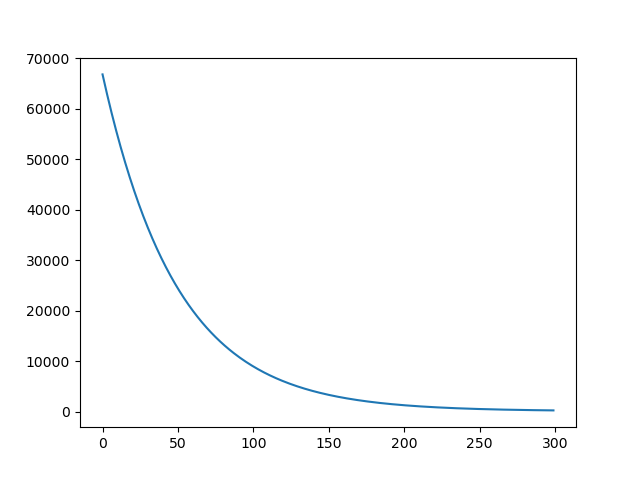

In [58]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

In [43]:
def mini_batch_gradient_desent(X,y,batch_size=200,learning_rate=0.01,max_steps=10):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    theta_list=[]
    
    data=np.hstack((X,y.reshape(-1,1)))
    
    for i in range(max_steps):
        
        #mini batch gradient desent
        
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        
        for j in range(total_batches):
            batch_data=data[j*batch_size:(j+1)*batch_size,:]
            x_batch=batch_data[:,:-1]
            y_batch=batch_data[:,-1]
            batch_gradient=gradient(x_batch,y_batch,theta)
            theta=theta-learning_rate*batch_gradient
            e=error(x_batch,y_batch,theta)
            error_list.append(e)
        theta_list.append(theta)    
        
    return theta,error_list,theta_list

In [44]:
theta,error_list,theta_list=mini_batch_gradient_desent(X,y)

In [23]:
theta

array([ 5.66067353, 38.9522679 , 53.90388271, 58.96992747, 28.26705674,
       96.97701519, 62.35767599, 81.60912956, 84.51823826, 73.20851587,
       96.5813017 ,  3.21073994, 12.49783925,  5.83744404, 15.25875947,
       45.06882713, 51.9032003 , 78.47697927, 30.45204668, 28.95494008,
       52.89618986])

<IPython.core.display.Javascript object>


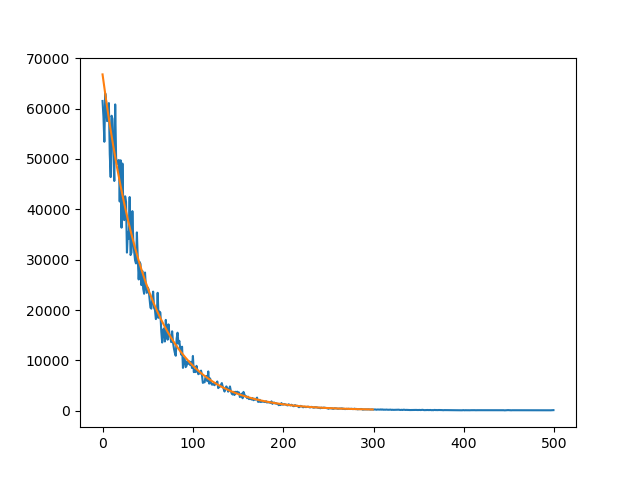

In [45]:
# import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

### here we can see mini batch is converging in 10 epoches whereas batch gradient is converging in 300 epochs

In [ ]:
# if using stochastic gradient i.e batch size ==1 then it will coverge more fast

In [59]:
def scho_batch_gradient_desent(X,y,batch_size=1,learning_rate=0.01,max_steps=10):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]
    theta_list=[]
    
    data=np.hstack((X,y.reshape(-1,1)))
    
    for i in range(max_steps):
        
        #mini batch gradient desent
        
        np.random.shuffle(data)
        m=data.shape[0]
        total_batches=m//batch_size
        
        for j in range(total_batches):
            batch_data=data[j*batch_size:(j+1)*batch_size,:]
            x_batch=batch_data[:,:-1]
            y_batch=batch_data[:,-1]
            batch_gradient=gradient(x_batch,y_batch,theta)
            theta=theta-learning_rate*batch_gradient
            e=error(x_batch,y_batch,theta)
            error_list.append(e)
        theta_list.append(theta)    
        
    return theta,error_list,theta_list

In [60]:
theta,error_list,theta_list=scho_batch_gradient_desent(X,y)

<IPython.core.display.Javascript object>


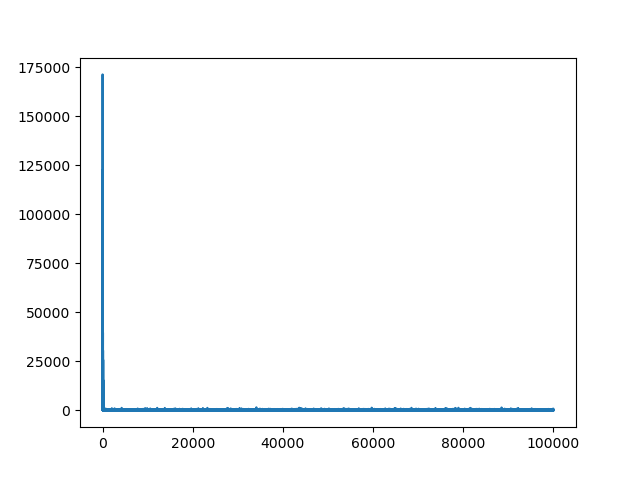

In [61]:
plt.plot(error_list)
plt.show()

## mini batch advantages:-

### fast convergence
### noisy updates helps to avoid local minima
### can use vectorization(cannot used in schocastic)
### no need to load entire dataset in memory